In [4]:
# libs para processamento
import geopandas as gpd
import cartopy.crs as ccrs
import plotly.express as px
import plotly.graph_objects as go

from hidromet.utils import dir_projeto
from shapely.geometry import Point
import json
from hidromet import modelos


diretorio = dir_projeto()

contornos = diretorio.joinpath("contornos", "iguacu.shp")
dir_series_concatenadas = diretorio.joinpath("arquivos", "series-concatenadas")

In [5]:
info_bacias = list(dir_series_concatenadas.glob("*.json"))

In [6]:
gdfs_bacias = list()
for arquivo_bacia in info_bacias:
    dados = open(arquivo_bacia)
    json_bacia = json.load(dados)
    nome_bacia = (arquivo_bacia.stem).replace("coords_", "")
    dict_bacia = dict()
    for posto in json_bacia:
        coords = Point(posto["longitude"], posto["latitude"])
        dict_bacia.update({posto["codigo"]: coords})

    gdf_bacia = gpd.GeoDataFrame.from_dict(dict_bacia, orient="index")
    gdf_bacia.columns = [nome_bacia]

    gdfs_bacias.append(gdf_bacia)

In [7]:
gdf_contornos = gpd.read_file(contornos)
crs = gdf_contornos.crs

In [8]:
for gdf in gdfs_bacias:
    coordenadas = gdf.iloc[:, 0].values.tolist()
    xs = [point.x for point in coordenadas]
    ys = [point.y for point in coordenadas]

    postos = gdf.index.values.tolist()
    posto = [posto for posto in postos]

In [9]:
import visualizacao
import pandas as pd

df_postos = pd.DataFrame({"x": xs, "y": ys, "posto": posto})
df_postos.set_index("posto", inplace=True)  

In [11]:
import pandas as pd

df_series = list()
series = list(dir_series_concatenadas.glob("*.csv"))
for serie in series:
    df = pd.read_csv(serie)
    df_series.append(df)

series_concatenadas = pd.concat(df_series, axis=1)

In [12]:
series_concatenadas.rename(columns={"Unnamed: 0": "time"}, inplace=True)
series_concatenadas.set_index("time", inplace=True)

<AxesSubplot:>

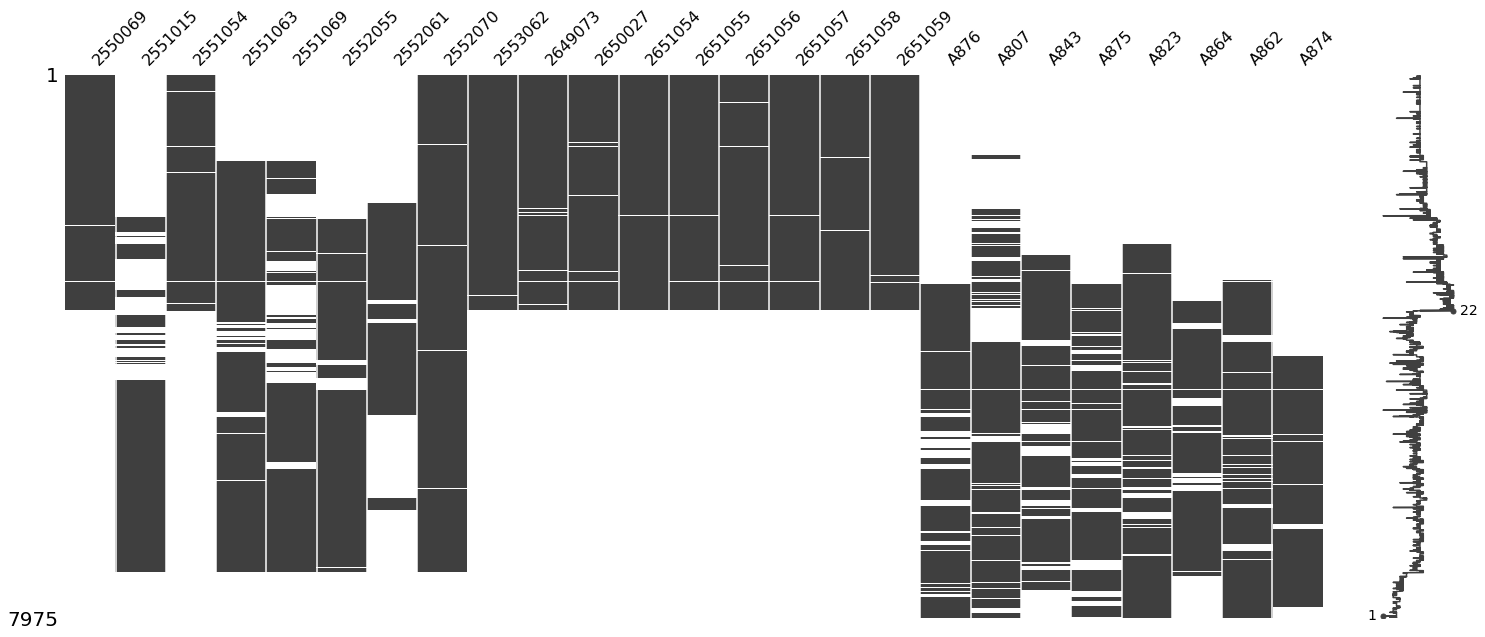

In [13]:
import missingno as msno

msno.matrix(series_concatenadas)

<AxesSubplot:>

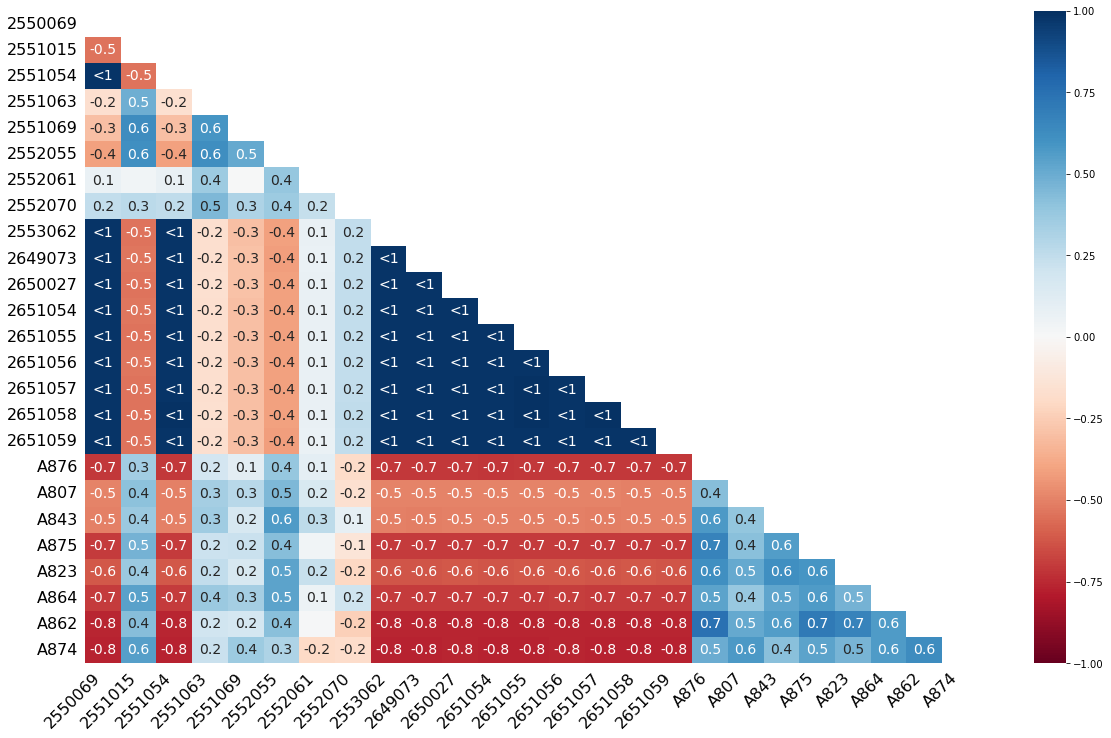

In [14]:
msno.heatmap(series_concatenadas)

<AxesSubplot:>

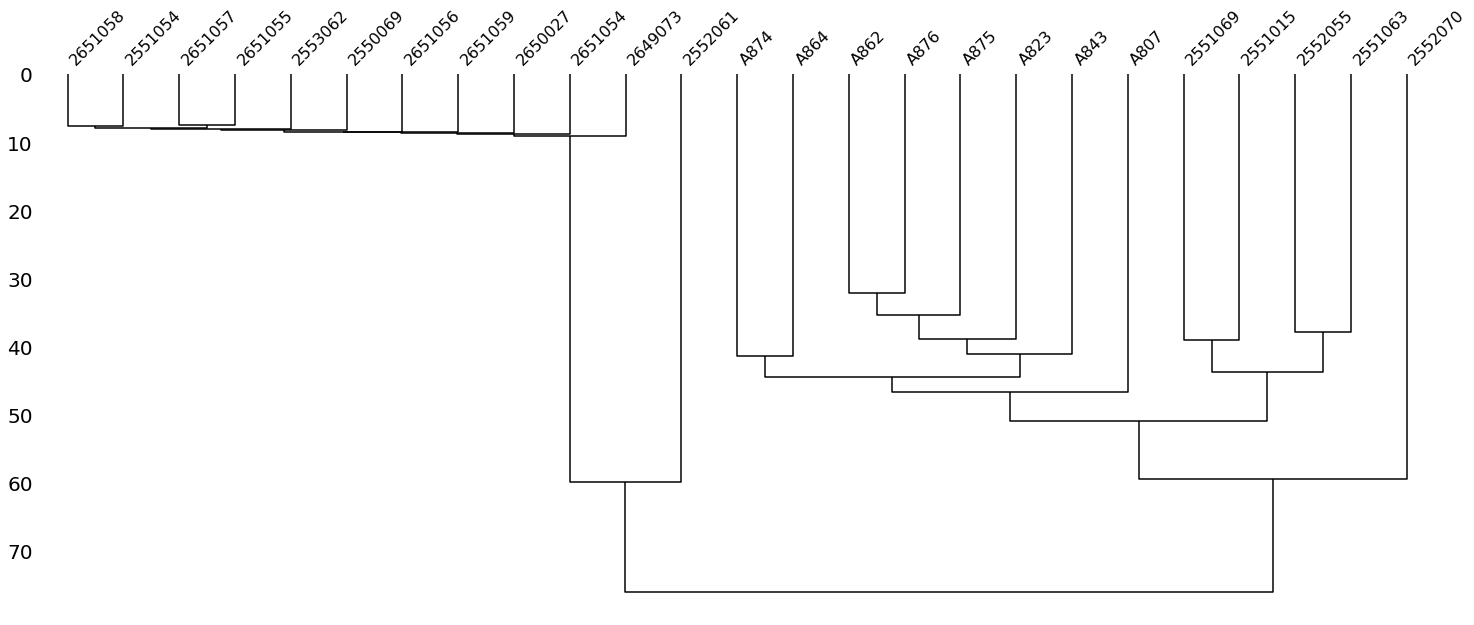

In [16]:
msno.dendrogram(series_concatenadas)